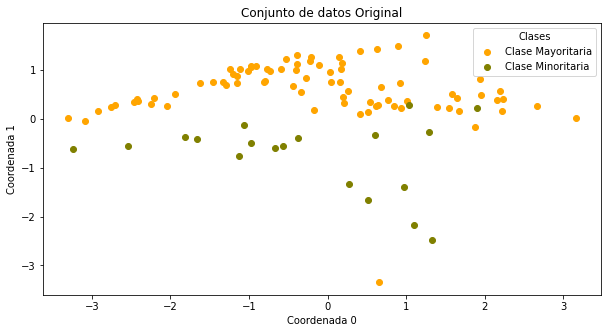

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

from sklearn.datasets import make_classification

import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)
X, y= make_classification(n_samples=100, 
                            n_features=3,
                            n_informative=2,
                            n_redundant=1,
                            n_repeated=0,
                            n_clusters_per_class=2,
                            weights=np.array([0.8, 0.2]),
                            random_state=7)
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='Clase Mayoritaria', c='orange')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='Clase Minoritaria', c='olive')
plt.title('Conjunto de datos Original')
plt.legend(loc="upper right", title="Clases")
plt.xlabel('Coordenada 0')
plt.ylabel('Coordenada 1')
plt.show()
# plt.legend()

In [5]:
print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 81
minority class: 19


In [13]:
oversampler= sv.distance_SMOTE(proportion=1.0)
X_samp, y_samp= oversampler.sample(X, y)

In [14]:
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

majority class: 81
minority class: 81


In [16]:
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

In [17]:
print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))
nuevos = np.sum(y_samp == 1)

majority new samples: 0
minority new samples: 62


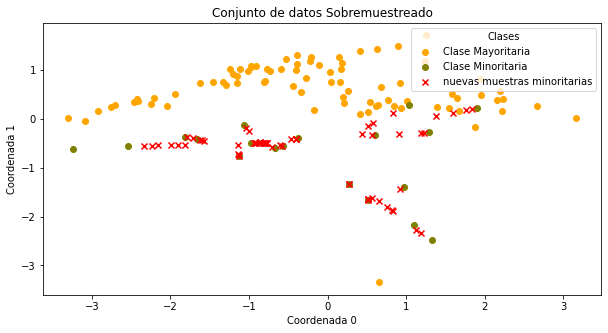

In [30]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='Clase Mayoritaria', c='orange', marker='o')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='Clase Minoritaria', c='olive', marker='o')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='nuevas muestras minoritarias', c='red', marker='x')
plt.title('Conjunto de datos Sobremuestreado')
plt.legend(loc="upper right", title="Clases")
plt.xlabel('Coordenada 0')
plt.ylabel('Coordenada 1')
plt.show()